## Capstone 1 
### House prices in the last 20 years 

In [3]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import pandas_profiling as pp
import seaborn as sns
from scipy.stats import kde



## Dataset  
I downloaded the dataset from kaggle. This dataset presents the Housing prices on Zillow from the year 1996 to 2018. The dataset is not the price of sale or purchase its just the listing price of the houses. The Dataset includes all of the states, major cities and the metro areas.I chose this Data set because I was curious if it was actually more effective to buy a house after a crash or just buy it before any of the financial crisis began. The dataset is significant because it shows the impact of Financial crisis on a country's housing market in popular states like New York, California and compare them to state of Colorado. I am exploring this dataset to figure out how much of a discount investment is a house after the crash. I am not taking in account the variables such as interest rates and inflation. 


In [24]:
#upload the dataset 
df = pd.read_csv(r'C:\Users\Rahul Miglani\zillow.csv')
# look at the dataset to identify columns I will be exploring
df.head(5) 

,Unnamed: 0,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
0,0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,334200.0,335400.0,...,1037400,1038700,1041500,1042800,1042900,1044400,1047800,1049700,1048300,1047900
1,1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,...,330400,332700,334500,335900,337000,338300,338400,336900,336000,336500
2,2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,498100.0,500900.0,...,1317900,1321100,1325300,1323800,1321200,1320700,1319500,1318800,1319700,1323300
3,3,93144,79936,El Paso,TX,El Paso,El Paso County,4,77300.0,77300.0,...,120800,121300,122200,123000,123600,124500,125600,126300,126800,127400
4,4,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,5,95400.0,95600.0,...,175500,176400,176900,176900,177300,178000,178500,179300,180200,180700


In [6]:
# look at number of rows and columns
numrows_cols = df.shape
numrows_cols

(15508, 281)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15508 entries, 0 to 15507
Columns: 281 entries, Unnamed: 0 to 2018-12
dtypes: float64(225), int64(52), object(4)
memory usage: 33.2+ MB


In [8]:
Region_Name = df['RegionName'].unique()
print(len(Region_Name))

15508


The Region name has a unique value for every single dataset, There are no patterns here that need to be explored here. 

In [9]:
# Now I have to decide which columns have null values and how many there are in the DF
none = df.isnull().sum()
none

Unnamed: 0       0
RegionID         0
RegionName       0
City             0
State            0
Metro         1403
CountyName       0
SizeRank         0
1996-04       1170
1996-05       1170
1996-06       1170
1996-07       1170
1996-08       1170
1996-09       1170
1996-10       1170
1996-11       1170
1996-12       1170
1997-01       1170
1997-02       1170
1997-03       1170
1997-04       1170
1997-05       1170
1997-06       1170
1997-07       1169
1997-08       1169
1997-09       1169
1997-10       1169
1997-11       1169
1997-12       1169
1998-01       1167
              ... 
2016-07          0
2016-08          0
2016-09          0
2016-10          0
2016-11          0
2016-12          0
2017-01          0
2017-02          0
2017-03          0
2017-04          0
2017-05          0
2017-06          0
2017-07          0
2017-08          0
2017-09          0
2017-10          0
2017-11          0
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04     

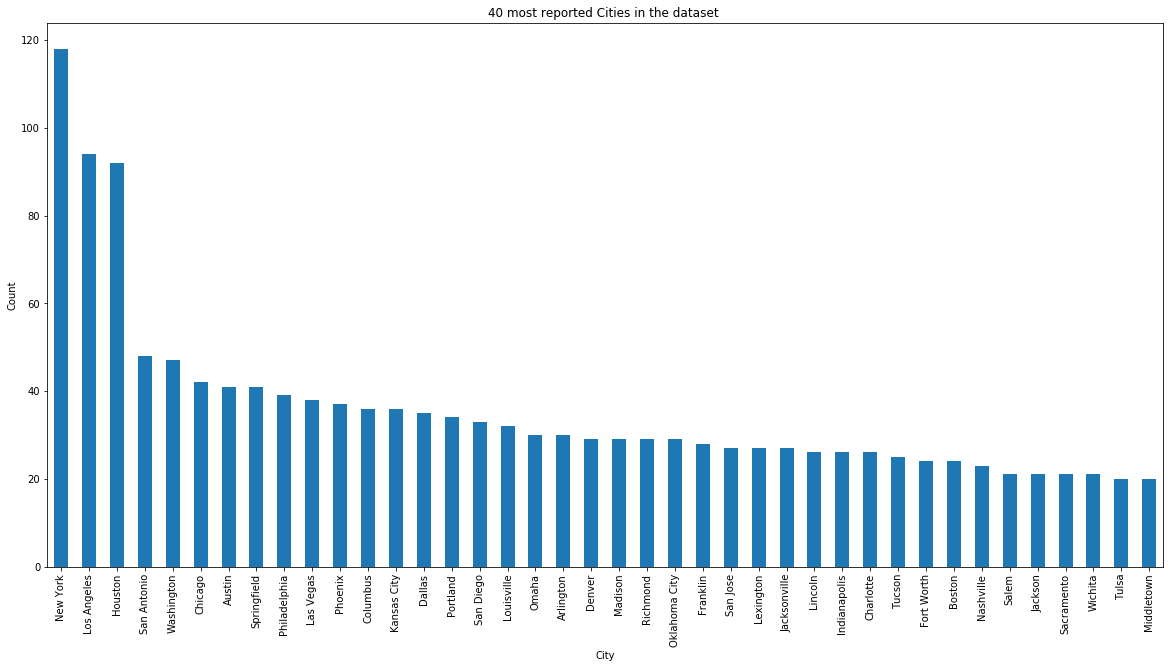

In [10]:
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 10.0 
df['City'].value_counts()[:40].plot(kind='bar')
plt.title('40 most reported Cities in the dataset ')
plt.xlabel('City')
plt.ylabel('Count')

plt.show()

The graph above shows the top 40 cities of the US reported in the Dataset. 

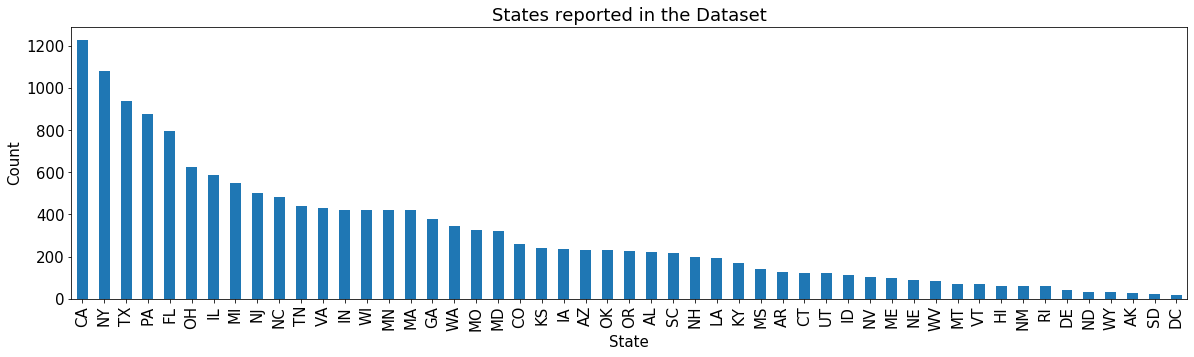

In [11]:
plt.rcParams['figure.figsize'] = 20, 5
plt.rcParams['font.size'] = 15.0 
df['State'].value_counts()[:51].plot(kind='bar')
plt.title('States reported in the Dataset')
plt.xlabel('State')
plt.ylabel('Count')

plt.show()

The graph above represents the States with the most and least number of houses in the Dataset. This gave me insight to find out "How the Financial crisis impacted different states. 

## Questions

### 1. Compare the impact of recession on Housing Markets of NY , CA, and CO. How much was the House worth after the crash?


In [12]:
# Here I have created a New Data Frame that will isolate State of New York and I included the following columns 
dfNY = df.loc[lambda df: df['State'] == 'NY',['RegionName','1996-04', '1996-05', '1999-06', '1999-07', '2000-08','2001-08','2002-08','2003-08'
                                             ,'2004-08','2005-08','2006-08','2007-08','2008-08','2009-08','2010-08','2011-08','2012-08','2013-08','2014-08',
                                             '2015-08','2016-08','2017-08','2018-08']]

In [13]:
# This function iterates over rows in my new dfNY and creates three columns with RegionName, Date and Values 
cols = ['1996-05', '1999-06', '1999-07', '2000-08','2001-08','2002-08','2003-08','2004-08','2005-08','2006-08','2007-08','2008-08','2009-08',
        '2010-08','2011-08','2012-08','2013-08','2014-08','2015-08','2016-08','2017-08','2018-08']

myd = {}

for row in dfNY.iterrows():

    for idx,col in enumerate(cols):
        
        if not pd.isnull(row[1][idx]):
            try: 
                myd['RegionName'].append(row[1][0])
                myd['Date'].append(cols[idx])
                myd['Value'].append(row[1][idx])
            except: 
                myd['RegionName'] = [row[1][0]]
                myd['Date'] = [cols[idx]]
                myd['Value'] = [row[1][idx]]

new_df = pd.DataFrame(myd)
new_df.head()

,RegionName,Date,Value
0,10467.0,1996-05,10467.0
1,10467.0,1999-06,152900.0
2,10467.0,1999-07,152700.0
3,10467.0,2000-08,166100.0
4,10467.0,2001-08,167300.0


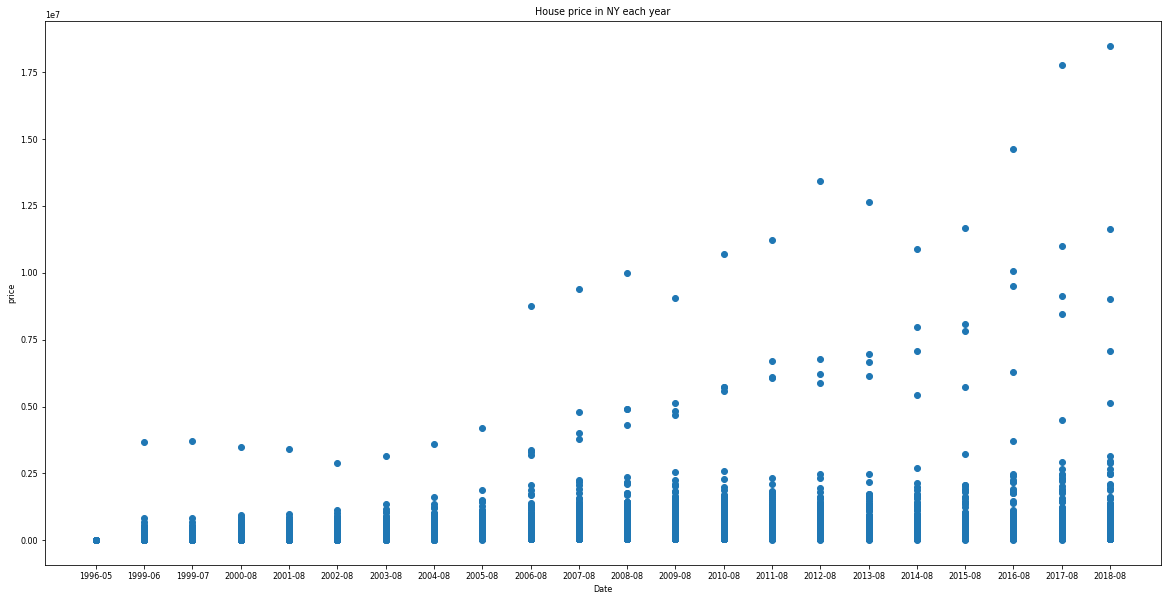

In [14]:
x = new_df['Date']
y = new_df['Value']
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 8.0 
plt.title('House price in NY each year')
plt.xlabel('Date')
plt.ylabel('price')
markersize=0.3
plt.scatter(x,y)
plt.show()


The graph above shows how the House prices fluctuated during the time period from 1996 to 2018 in the State of NY. There is small decrease during the 2002 but since then the market has been growing at a high rate. Then comes the financial crisis of 2008 and except we dont see much decrease in the price in the state of NY. The difference between the mean of 2007 and 2008 comes out to be 36800. 

In [15]:
#Summary Stats
avg = df.loc[lambda df: df['State'] == 'NY',['2007-08']].mean(), 
avg

(2007-08    317751.588785
 dtype: float64,)

In [16]:
avg2 = df.loc[lambda df: df['State'] == 'NY',['2011-08']].mean()
avg2 

2011-08    280951.351351
dtype: float64

In [17]:
317751 - 280951

36800

In [18]:

dfCA = df.loc[lambda df: df['State'] == 'CA',['RegionName','1996-04', '1996-05', '1999-06', '1999-07', '2000-08','2001-08','2002-08','2003-08'
                                             ,'2004-08','2005-08','2006-08','2007-08','2008-08','2009-08','2010-08','2011-08','2012-08','2013-08','2014-08',
                                             '2015-08','2016-08','2017-08','2018-08']]

In [19]:
cols = ['1996-05', '1999-06', '1999-07', '2000-08','2001-08','2002-08','2003-08','2004-08','2005-08','2006-08','2007-08','2008-08','2009-08',
        '2010-08','2011-08','2012-08','2013-08','2014-08','2015-08','2016-08','2017-08','2018-08']

myd = {}

for row in dfCA.iterrows():

    for idx,col in enumerate(cols):
        
        if not pd.isnull(row[1][idx]):
            try: 
                myd['RegionName'].append(row[1][0])
                myd['Date'].append(cols[idx])
                myd['Value'].append(row[1][idx])
            except: 
                myd['RegionName'] = [row[1][0]]
                myd['Date'] = [cols[idx]]
                myd['Value'] = [row[1][idx]]

new_dfCA = pd.DataFrame(myd)
new_dfCA.head()

,RegionName,Date,Value
0,94109.0,1996-05,94109.0
1,94109.0,1999-06,766000.0
2,94109.0,1999-07,771100.0
3,94109.0,2000-08,1353300.0
4,94109.0,2001-08,1384000.0


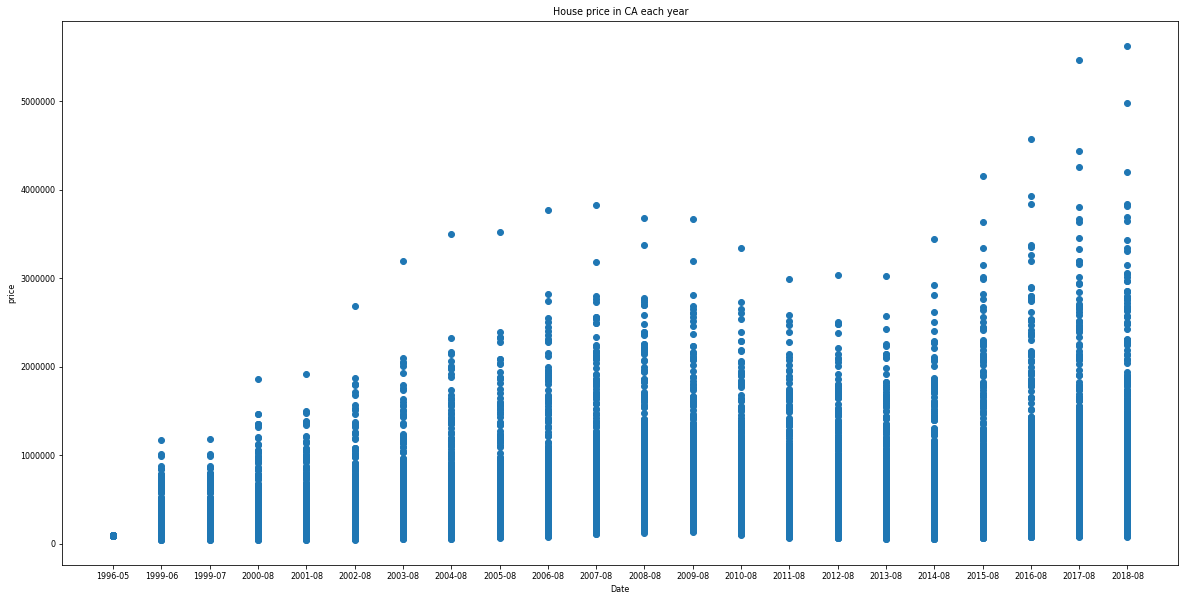

In [20]:
a = new_dfCA['Date']
b = new_dfCA['Value']
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 8.0 
plt.title('House price in CA each year')
plt.xlabel('Date')
plt.ylabel('price')
markersize=0.3
plt.scatter(a,b)
plt.show()


On average a house worth almost 600000k was worth 200000k less in the State of CA. 

In [21]:
avg3 = df.loc[lambda df: df['State'] == 'CA',['2007-08']].mean(), 
avg3

(2007-08    593773.902237
 dtype: float64,)

In [22]:
avg4 = df.loc[lambda df: df['State'] == 'CA',['2011-08']].mean(), 
avg4

(2011-08    411145.619835
 dtype: float64,)

In [23]:
diff2 = 593773- 411145
diff2

182628

Text(0, 0.5, ' mean values')

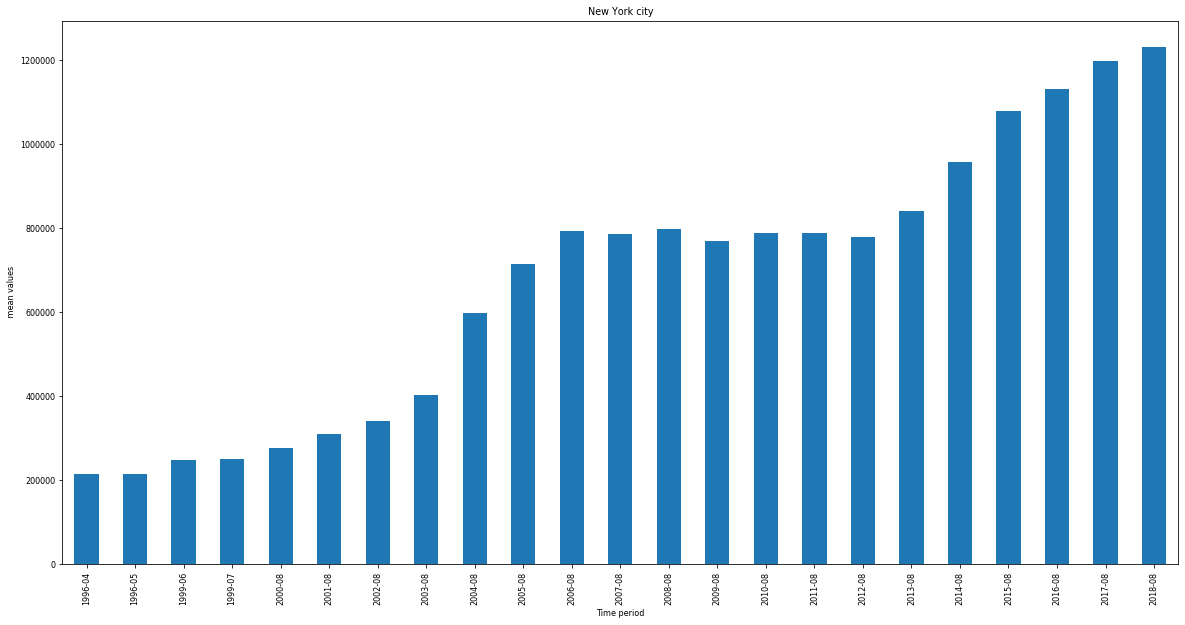

In [26]:
n_y1 = df.loc[lambda df: df['City'] == 'New York',['1996-04', '1996-05', '1999-06', '1999-07', '2000-08','2001-08','2002-08','2003-08'
                                             ,'2004-08','2005-08','2006-08','2007-08','2008-08','2009-08','2010-08','2011-08','2012-08','2013-08','2014-08',
                                             '2015-08','2016-08','2017-08','2018-08']]
n_y1.mean().plot(kind='bar')
plt.title('New York city')
plt.xlabel('Time period')
plt.ylabel(' mean values')
 


Text(0, 0.5, ' mean values')

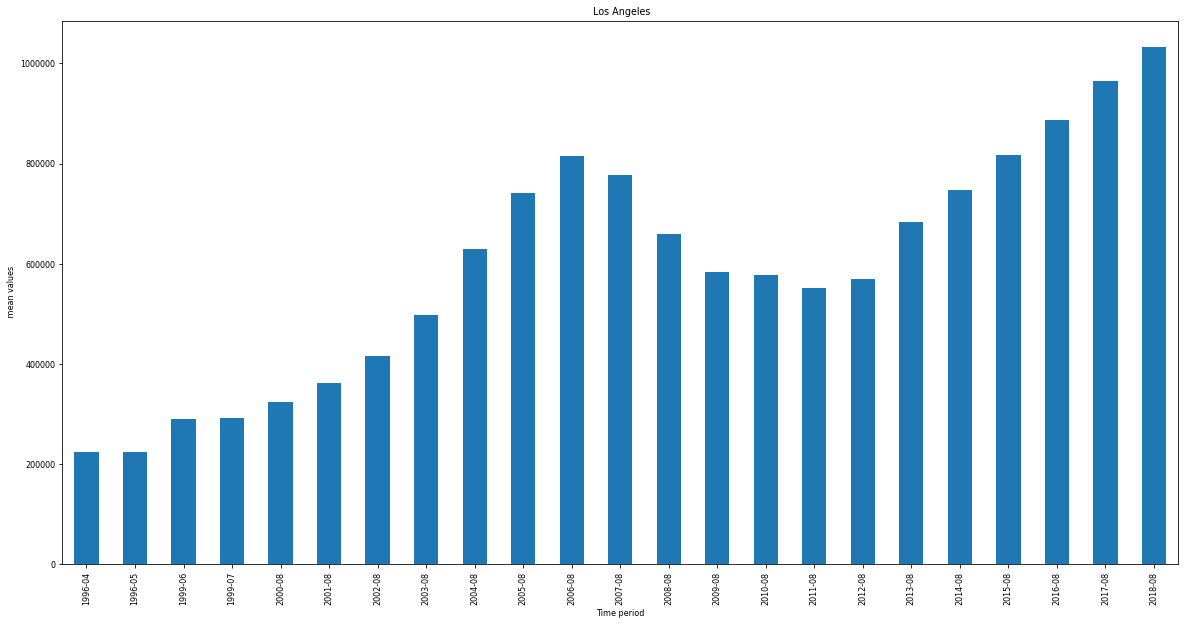

In [27]:
Springs = df.loc[lambda df: df['City'] == 'Los Angeles',['1996-04', '1996-05', '1999-06', '1999-07', '2000-08','2001-08','2002-08','2003-08'
                                             ,'2004-08','2005-08','2006-08','2007-08','2008-08','2009-08','2010-08','2011-08','2012-08','2013-08','2014-08',
                                             '2015-08','2016-08','2017-08','2018-08']]
Springs.mean().plot(kind='bar')
plt.title(' Los Angeles')
plt.xlabel('Time period')
plt.ylabel(' mean values')
 

In [29]:
dfCO = df.loc[lambda df: df['State'] == 'CO',['RegionName','1996-04', '1996-05', '1999-06', '1999-07', '2000-08','2001-08','2002-08','2003-08'
                                             ,'2004-08','2005-08','2006-08','2007-08','2008-08','2009-08','2010-08','2011-08','2012-08','2013-08','2014-08',
                                             '2015-08','2016-08','2017-08','2018-08']]

In [30]:
cols = ['1996-05', '1999-06', '1999-07', '2000-08','2001-08','2002-08','2003-08','2004-08','2005-08','2006-08','2007-08','2008-08','2009-08',
        '2010-08','2011-08','2012-08','2013-08','2014-08','2015-08','2016-08','2017-08','2018-08']

myd = {}

for row in dfCO.iterrows():

    for idx,col in enumerate(cols):
        
        if not pd.isnull(row[1][idx]):
            try: 
                myd['RegionName'].append(row[1][0])
                myd['Date'].append(cols[idx])
                myd['Value'].append(row[1][idx])
            except: 
                myd['RegionName'] = [row[1][0]]
                myd['Date'] = [cols[idx]]
                myd['Value'] = [row[1][idx]]

new_dfCO = pd.DataFrame(myd)
new_dfCO.head()

,RegionName,Date,Value
0,80134.0,1996-05,80134.0
1,80134.0,1999-06,193700.0
2,80134.0,1999-07,193500.0
3,80134.0,2000-08,229300.0
4,80134.0,2001-08,231400.0


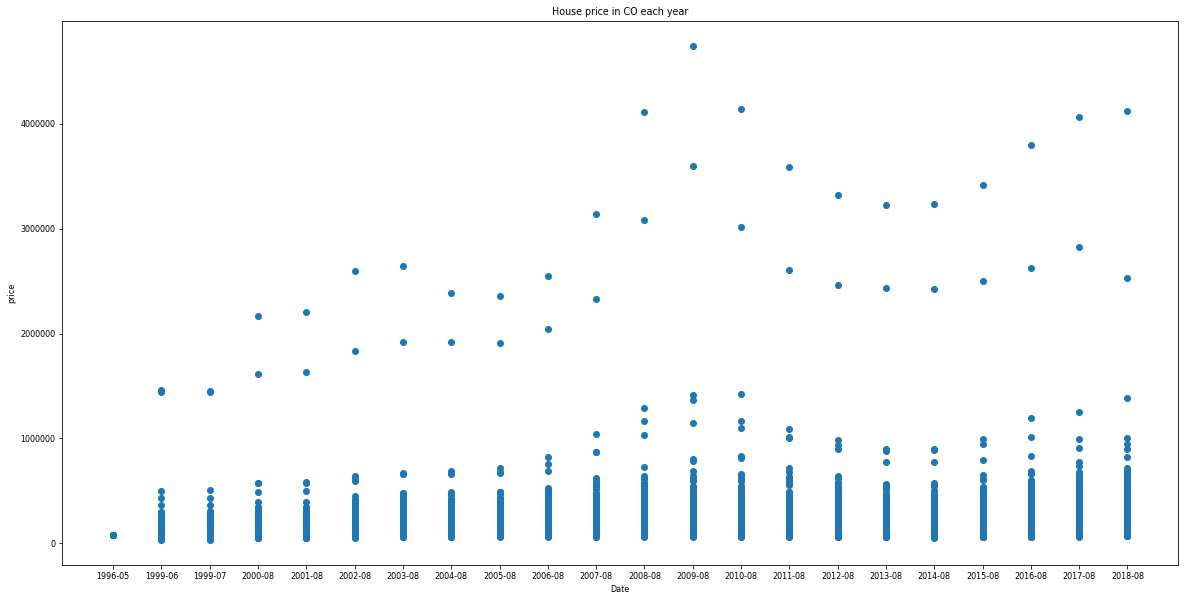

In [31]:
c = new_dfCO['Date']
d = new_dfCO['Value']
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 8.0 
plt.title('House price in CO each year')
plt.xlabel('Date')
plt.ylabel('price')
markersize=0.3
plt.scatter(c,d)
plt.show()


### 2. How Much was Colorado affected by the Housing Crisis from 2008-2011?

In [50]:

#To select rows whose column value equals a scalar, some_value, use ==:
Date_cols = ['2000-08','2008-08','2009-08', '2010-08','2011-08','2012-08']
colorado = df.loc[df['State'] == 'CO', Date_cols]

C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rahul Miglani\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


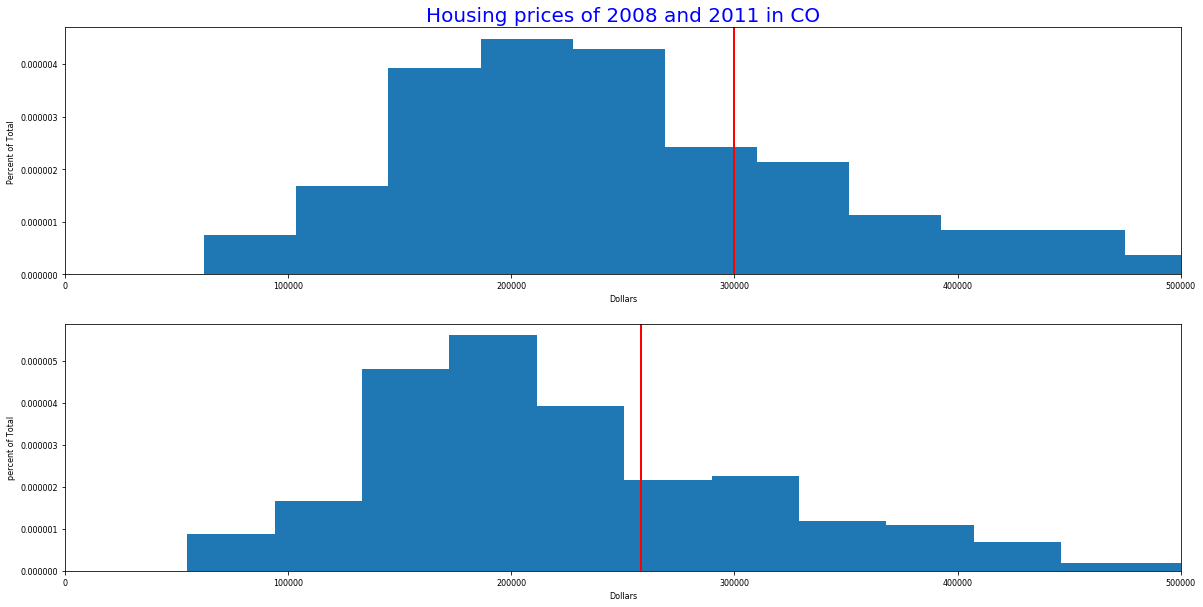

In [54]:
f, axarr = plt.subplots(2,1,figsize=(20,10))
# plot hist of sample means for first var on the top subplot
axarr[0].hist(colorado['2008-08'],normed=True, bins='auto')
# plot hist of sample means for second var on the top subplot
axarr[1].hist(colorado['2011-08'],normed=True,bins='auto')
axarr[0].set_title('Housing prices of 2008 and 2011 in CO', color = 'b',fontsize = 20)
axarr[0].set(xlim=(0, 500000),xlabel = 'Dollars', ylabel="Percent of Total")
axarr[1].set(xlim=(0, 500000), xlabel = 'Dollars', ylabel="percent of Total")
axarr[0].axvline(colorado['2008-08'].mean(), color='r', linestyle='solid', linewidth=2)
axarr[1].axvline(colorado['2011-08'].mean(), color='r', linestyle='solid', linewidth=2)


plt.show()

The graph above shows the price fluctuation just a coule years after the recession in CO. The meanand the median in 2008 was 299671.53 and 238500 respectively whereas the mean and the median in 2011 was 258256.15 and 209900. The difference between the two means gives us 41415. It means that the markets were still in a slump 2 to 3 years after the crash. There could be more cariable impacting this such as inflation, interest rate hikes and slow growth overall in the economy. 

In [85]:
a1 = colorado['2008-08'].mean(), 
a2 =colorado['2011-08'].mean()
a1,a2

((299671.53846153844,), 258256.15384615384)

In [83]:
b = colorado['2008-08'].median(), colorado['2011-08'].median()

(238500.0, 209900.0)

In [1]:
di_ff = 299671-258256
di_ff

41415

### 3.Housing Market of US today compare to 2009?

In [72]:
#  Here I had to remove null values 
print(df[df['2007-08'].isnull()])

       Unnamed: 0  RegionID  RegionName               City State  \
39             39     61796       10456           New York    NY   
97             97     84613       60611            Chicago    IL   
350           350     62036       11225           New York    NY   
402           402     84340       60085           Waukegan    IL   
493           493     87563       67401             Salina    KS   
541           541     65798       19131       Philadelphia    PA   
726           726     73596       35758            Madison    AL   
879           879     70817       30032     Candler-Mcafee    GA   
888           888     88539       70301          Thibodaux    LA   
900           900     62004       11101           New York    NY   
1043         1043     71286       30721             Dalton    GA   
1405         1405     79755       49442           Muskegon    MI   
1738         1738     79612       49221             Adrian    MI   
1798         1798     97810       94608         

In [73]:
#remove all non numeric values 
df1['2007-08'] = pd.to_numeric(df['2007-08'], errors='coerce')

In [74]:
df1= df1.dropna()
df1['2007-08'] = df1['2007-08'].astype(int)
df1.isnull().sum()

Unnamed: 0    0
RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
1996-04       0
1996-05       0
1996-06       0
1996-07       0
1996-08       0
1996-09       0
1996-10       0
1996-11       0
1996-12       0
1997-01       0
1997-02       0
1997-03       0
1997-04       0
1997-05       0
1997-06       0
1997-07       0
1997-08       0
1997-09       0
1997-10       0
1997-11       0
1997-12       0
1998-01       0
             ..
2016-07       0
2016-08       0
2016-09       0
2016-10       0
2016-11       0
2016-12       0
2017-01       0
2017-02       0
2017-03       0
2017-04       0
2017-05       0
2017-06       0
2017-07       0
2017-08       0
2017-09       0
2017-10       0
2017-11       0
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
2018-05       0
2018-06       0
2018-07       0
2018-08       0
2018-09       0
2018-10       0
2018-11       0
2018-12       0
Length: 281, dtype: int6

In [88]:
df1.shape

(13254, 281)

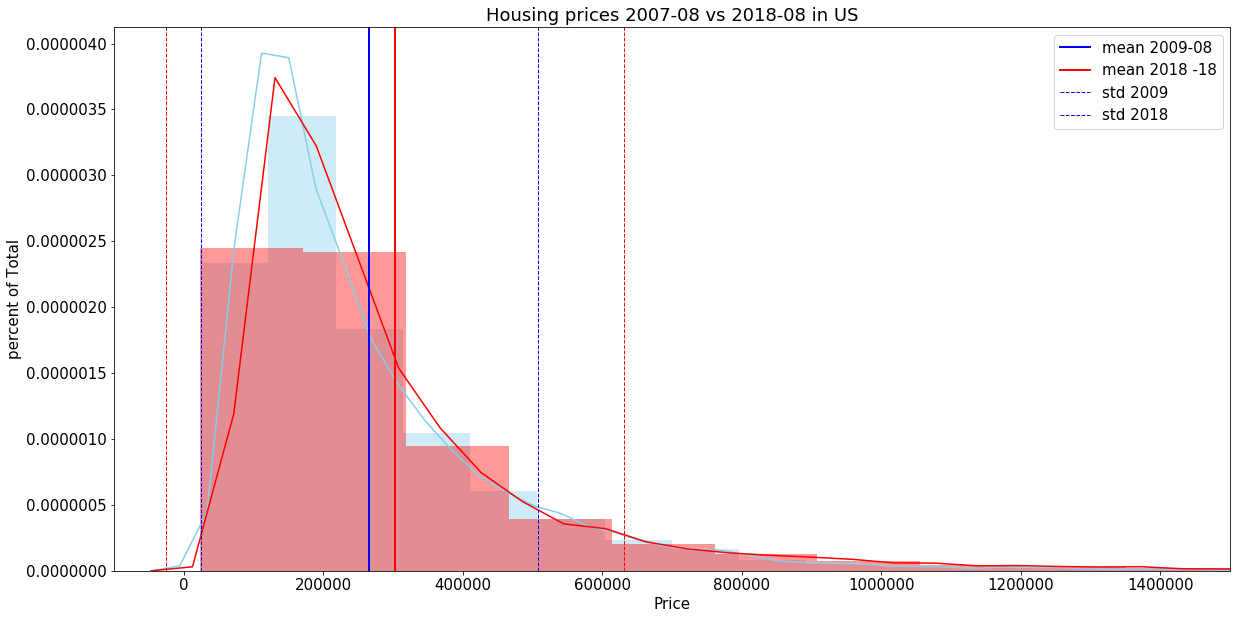

In [91]:
rcParams['figure.figsize'] = 20, 10


g = sns.distplot( df1["2007-08"] , color="skyblue", label="")
sns.distplot( df1["2018-08"] , color="red").set_title("Housing prices 2007-08 vs 2018-08 in US")
g.set(xlim=(-100000, 1500000))
g.set(ylabel = 'percent of Total')
g.set(xlabel = 'Price')
plt.axvline(df1['2007-08'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df1['2018-08'].mean(), color='r', linestyle='solid', linewidth=2)

plt.axvline(df1['2007-08'].mean() + df1['2007-08'].std(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df1['2007-08'].mean() - df1['2007-08'].std(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df1['2018-08'].mean() + df1['2018-08'].std(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df1['2018-08'].mean() - df1['2018-08'].std(), color='r', linestyle='dashed', linewidth=1)

plt.gca().legend(('mean 2009-08','mean 2018 -18','std 2009','std 2018'))
plt.show()

#sns.plt.show()

The graph above represents US Housing market before the recession in 2007 vs 2018. We have definitly eclipsed those prices but not by much. 

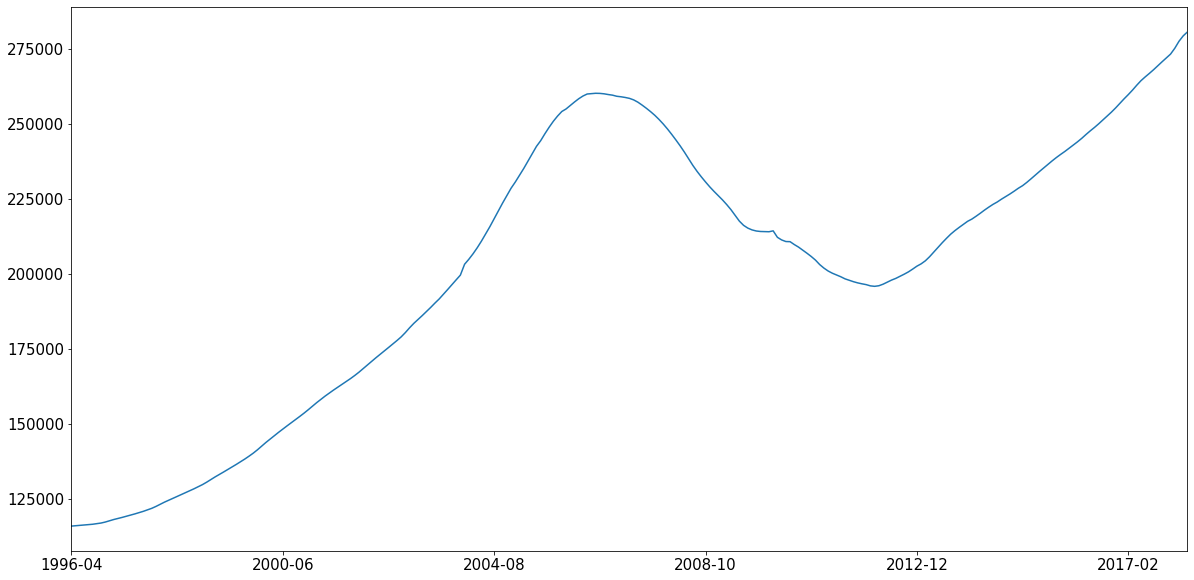

In [133]:
df.iloc[:,8:273].mean().plot()

This graph clearly shows the impact the recession had on the Housing economy of the United States. It is definitely worth the investment to  buy a house 
after the crash as you can make tremendous amount of capital gains. 

### Proposed further research 
    
    After doing this EDA it would be very beneficial to to know when is the right time to invest in Housing Market or buy a house in general to make the most gains on your capital. It would also be beneficial to know how the inflation rate has played a role in these prices.There is much to be learned from these once in a while finiancial crisis. Their impact can be see all over the country especiall in emerging markets such as Colorado. While these events propose a great investment opportunity, it is also a great learning opportunity because it can give us more insight on the Financial system can be improved and the impact of recession can be decreased